*Alfano Sebastián - Julian Swerdlin*

# Cuarto Proyecto: Entrenamiento y prueba de modelos
 

In [119]:
#Subimos el dataset
from google.colab import files
SubirArchivo = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [120]:
#Cargamos la libreria de pandas que es muy util porque agrega muchas funciones
import pandas as pd

#Cargamos una variable que contenga el archivo que acabamos de subir
Ad = pd.read_csv("Social_Network_Ads.csv")

In [122]:
#Como el Genero en este DataSet esta representado por letras(String) lo tenemos que pasar a dummy(0, 1)
Genero_binario = pd.get_dummies(Ad["Gender"], drop_first=True)

#Ahora la columna Gender va a ser igual a la nueva variable que creamos con el genero en 1 y 0.
Ad["Gender"] = Genero_binario

#Ahora dejamos solo estas cuatro variables y en este orden
Ad_Nuevo = Ad.drop(columns= "User ID")


Comparamos la tabla anterior con la nueva y observamos que ya no tenemos la columna de User ID y que 1 es Male (Hombre) y 0 es Female (Mujer).

# Separación de entrenamiento y validación
 
Este paso es vital para probar el modelo. También debes de recordar, que en el caso de que quieras crear alguna variable extra o transformación al conjunto de datos (PCA por ejemplo) a usar en el entrenamiento, debes de hacer todos los cálculos sólo con el conjunto de entrenamiento, por lo que es probable que debas regresar al análisis exploratorio una vez realizada la división. Estos pasos los explicamos de una forma lineal, pero realmente los proyectos reales son iterativos y tienen mucho de ir y venir.

**Añade cualquier comentario sobre la separación aquí, por ejemplo ¿Qué porcentaje dejas en validación y porque?**

In [123]:
#Cargamos la libreria que nos permite generar datos de testeo y entrenamiento de manera aleatoria
from sklearn.model_selection import train_test_split

In [124]:
#Asignamos en X lo que vamos a usar para predecir
x = Ad_Nuevo[["Age","EstimatedSalary","Gender"]]
#Asignamos en Y lo que vamos a predecir
y = Ad_Nuevo["Purchased"]
#Separamos los datos en testeo y entrenamiento
train, test = train_test_split(Ad_Nuevo, random_state=0)

La separación entre entrenamiento y validación lo damos de manera aleatoria, es decir, usamos la funcion de **sklearn** *train_test_split*, que nos separa los datos de manera tal que deja el 75% a entrenamiento y el 25% restante a validacion.

In [125]:
print("Cantidad total de datos:", Ad_Nuevo.shape)
print("Cantidad de datos en Entrenamiento:", train.shape)
print("Cantidad de datos en Validación:", test.shape)

Cantidad total de datos: (400, 4)
Cantidad de datos en Entrenamiento: (300, 4)
Cantidad de datos en Validación: (100, 4)


In [126]:
#Ahora lo separamos entre X e Y
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

# Entrenamiento

Llegó el momento del entrenamiento, eres libre de elegir los modelos que quieras usar, te recomendamos entrenar varios modelos y usar diferentes hiper parámetros dentro de cada uno. Finalmente comenta sobre los tiempos de entrenamiento de cada modelo y el rendimiento de los mismos utilizando el mismo conjunto de entrenamiento. ¿Hay señales de sobre ajuste en alguno de ellos?

**Realiza comentarios sobre los modelos escogidos ¿porque escogiste esos modelos?**

### **GridSearchCV y RandomForestClassifier**

**Grid Search Cross Validation:**
Lo que hace esta funcion es ir agarrando distintas partes de los datos y por bloques de un mismo tamaño los separa en datos de entrenamiento.Tambien prueba con los distintos parametros que nosotros asignamos. Con esta funcion se puede probar con cual aprendio mejor.

**Random Forest Classifier:**
Es una funcion de prediccion que separa en arboles de decision individuales y de todos esos se utiliza el mejor.

In [127]:
#Cargamos el modelo de Cross Validation
from sklearn.model_selection import GridSearchCV
#Cargamos el modelo de RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [128]:
#Asignamos los hiperparametros en el RandomForest para probar cual es mejor
hiperparam = {"n_estimators":[1,2,4,8,15,30,50,80,100], "max_depth":[1,2,3,4], "max_features":[1,2,3], "bootstrap":[True, False]}

In [129]:
#Cargamos el modelo con la variable random_forest
random_forest = RandomForestClassifier()

In [130]:
#Creamos una variable en donde guardamos de a cuantos numeros va a hacer el CrossValidation, en este caso 5
grid = GridSearchCV(estimator=random_forest, param_grid=hiperparam, cv=5)

In [131]:
%%time
#Entrenamos el modelo
grid.fit(x_train, y_train)

CPU times: user 47.4 s, sys: 336 ms, total: 47.8 s
Wall time: 47.7 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [132]:
#Pedimos que nos muestre los mejores parametros para ver cuales escogio
grid.best_params_

{'bootstrap': True, 'max_depth': 2, 'max_features': 3, 'n_estimators': 8}

### **K-Nearest Neighbors**

**KNN:** Este modelo clasifica a un nuevo dato en un grupo dependiendo la cantidad de vecinos del mismo grupo que haya, es decir, si el nuevo dato ingresado esta cerca de muchos otros de un mismo grupo, lo calsificara dentro de ese mismo.

In [133]:
#Importamos el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier

#Asignamos que cuando identifique tan solo 5 vecinos lo clasifique
knn = KNeighborsClassifier(3)

In [134]:
%%time
#Lo entrenamos
knn.fit(x_train, y_train)

CPU times: user 2.25 ms, sys: 7 µs, total: 2.26 ms
Wall time: 2.14 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

###**Logistic Regression**

**Regresion Logistica:** Lo que hace este modelo es buscar una relacion entre las variables y ver de que grupo es mas probable que sea segun ese vinculo para clasificarlo.

In [135]:
#Importamos el modelo de Logistica Regression
from sklearn.linear_model import LogisticRegression

In [136]:
%%time
#Lo entrenamos
LR = LogisticRegression()

LR.fit(x_train, y_train)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 14.9 ms


# Prueba y evaluación
 
Una vez que se tienen entrenados los modelos es hora de probarlos usando el conjunto de validación, es muy importante seleccionar la métrica a evaluar para tomar la decisión de cuál es el mejor modelo antes de calcularlas. Esto es para evitar sesgos personales sobre el desempeño de los diferentes modelos. 

### **GridSearchCV y RandomForestClassifier**

Entrenamiento

In [137]:
#Le pedimos que nos diga cual fue el mejor resultado con los mejores parametros en entrenamiento
grid.best_estimator_.score(x_train, y_train)

0.93

Validación

In [138]:
#Le pedimos que nos diga cual fue el mejor resultado con los mejores parametros en testeo
grid.best_estimator_.score(x_test, y_test)

0.87

### **K-Nearest Neighbors**

Entrenamiento

In [139]:
#Entrenamos el modelo con la variable knn
knn.score(x_train, y_train)

0.9133333333333333

Validación

In [140]:
#Testeamos el modelo con la variable knn
knn.score(x_test, y_test)

0.76

###**Logistic Regression**

Entrenamiento

In [141]:
#Entrenamos
LR.score(x_train, y_train)

0.6766666666666666

Validación

In [142]:
#Testeamos
LR.score(x_test, y_test)

0.56

##Graficos comparativos

In [143]:
#Importamos la librearia para hacer los graficos
import seaborn as sns

#Creamos un dataset con nuestros resultados
RFC = ["Random Forest", grid.best_estimator_.score(x_train, y_train), grid.best_estimator_.score(x_test, y_test)]
KN = ["K-Nearest Neighbors", knn.score(x_train, y_train), knn.score(x_test, y_test)]
LRs = ["Logistic Regression", LR.score(x_train, y_train), LR.score(x_test, y_test)]

lista = [RFC, KN, LRs]

modelosDF = pd.DataFrame(lista, columns=["Nombre", "Entrenamiento", "Testeo"])

Score-Entrenamiento

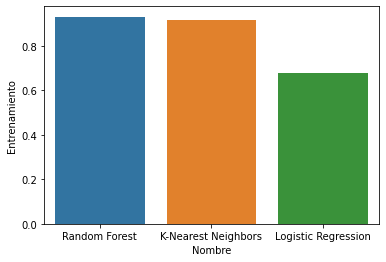

In [150]:
sns.barplot(data = modelosDF, x = "Nombre", y = "Entrenamiento")

Score-Testeo

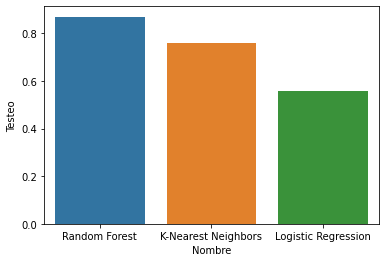

In [151]:
sns.barplot(data = modelosDF, x = "Nombre", y = "Testeo")

# Presentación de resultados
 
El proyecto finaliza al presentar las conclusiones y resultados, documenta todo lo descubierto durante el proyecto, desde la generación de la pregunta a resolver, pasando por aquellas características que descubriste en el análisis exploratorio hasta la respuesta en sí de la pregunta planteada. En esta etapa, no solo es válido, sino que se motiva el uso de gráficos y, además, es de un valor importante poder explicar lo que se hizo y lo que se descubrió de una forma que la persona que lo lea entienda sin importar si conoce algo de ciencia de datos o no. 

In [ ]:
# Es recomendable usar gráficos en esta parte, no importa si algunos son repetidos. 

### RandomForest

In [ ]:
#Realizamos una prediccion de una mujer de 40 años con un salario de 100 mil
print("Mujer:", grid.best_estimator_.predict([[40, 100000, 0]]))
print("Hombre:", grid.best_estimator_.predict([[40, 100000, 1]]))

Mujer: [1]
Hombre: [1]


*Efectivamente en este modelo las personas con un alto salario y alta edad compran luego de ver la publicidad*

### KNN

In [152]:
#Realizamos una prediccion de una mujer de 40 años con un salario de 100 mil
print("Mujer:", knn.predict([[40, 100000, 0]]))
print("Hombre:", knn.predict([[40, 100000, 1]]))

Mujer: [1]
Hombre: [1]


*Efectivamente en este modelo las personas con un alto salario y alta edad compran luego de ver la publicidad*

### Regresion Logistica

In [153]:
#Realizamos una prediccion de una mujer de 40 años con un salario de 100 mil
print("Mujer:", LR.predict([[40, 100000, 0]]))
print("Hombre:", LR.predict([[40, 100000, 1]]))

Mujer: [0]
Hombre: [0]


*En este modelo las personas con un alto salario y alta edad no compran luego de ver la publicidad, debido a que es el que peor funciona*

In [158]:
#Creamos un dataset con nuestros resultados
prediccion = [LR.predict([[40, 100000, 0]]), LR.predict([[40, 100000, 1]]), knn.predict([[40, 100000, 1]]), knn.predict([[40, 100000, 0]]), grid.best_estimator_.predict([[40, 100000, 1]]), grid.best_estimator_.predict([[40, 100000, 0]])]

pred_DF = pd.DataFrame(prediccion, columns=["Prediccion"])

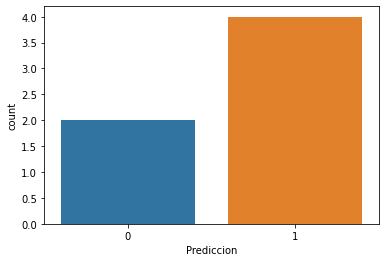

In [162]:
#Ejecutamos un grafico que nos muestre la cantidad que compraron y las que no segun los modelos
sns.countplot(data = pred_DF, x = "Prediccion")

## **Conclusiones**

A lo largo del proyecto, lo que llegamos a concluir es que nuestra hipotesis inicial era correcta, ya que, de acuerdo a nuestros dos mejores modelos predictivos, cuanto mayor sea la edad y el salario, las personas tienden a comprar más luego de ver un anuncio.